<a href="https://colab.research.google.com/github/MuhammadHuzaifaGhani/Machine-Learning/blob/main/Task_2_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
data=pd.read_csv('/content/Mall_Customers.csv')
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [236]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [237]:
data.describe(exclude=['int64','float64'])

,Gender
count,200
unique,2
top,Female
freq,112


In [238]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [239]:
data.shape

(200, 5)

In [240]:
print("Duplicates :",data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicates : 0


In [241]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data = data.drop('CustomerID', axis=1)
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [242]:
values = data['Gender'].value_counts().sort_index()
print(values.head(10))

Gender
0    112
1     88
Name: count, dtype: int64


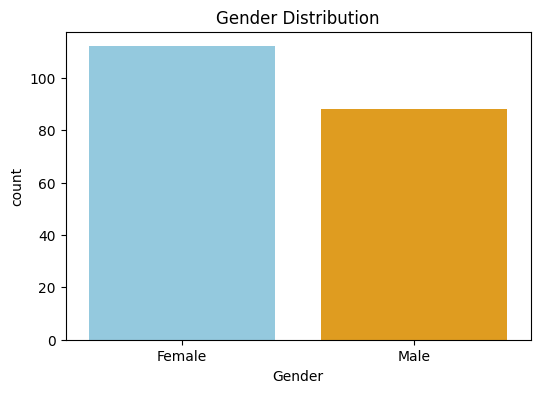

In [243]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, hue='Gender', palette={0: 'skyblue', 1: 'orange'}, legend=False)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

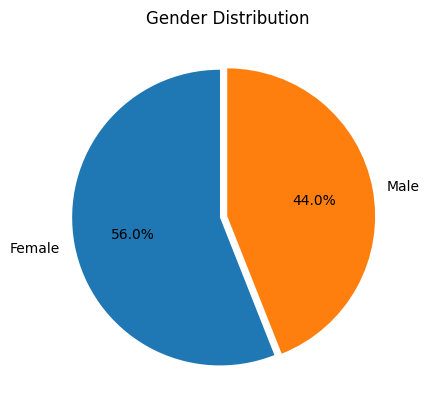

In [244]:
values = data['Gender'].value_counts().sort_index()
labels = ['Female', 'Male']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.05,0))
plt.title('Gender Distribution')
plt.show()

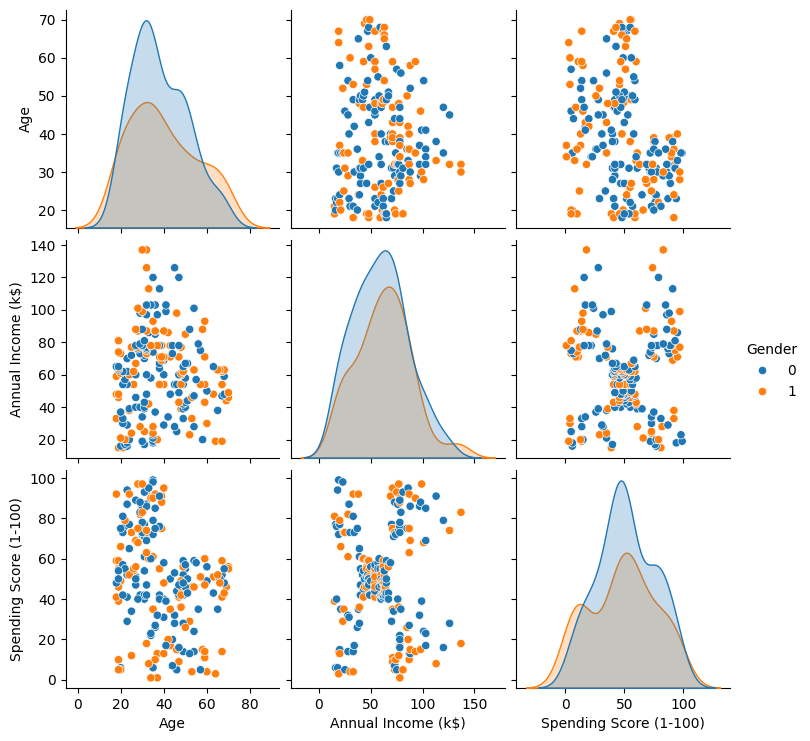

In [245]:
sns.pairplot(data, vars=['Age','Annual Income (k$)','Spending Score (1-100)'], hue='Gender', height=2.5)
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

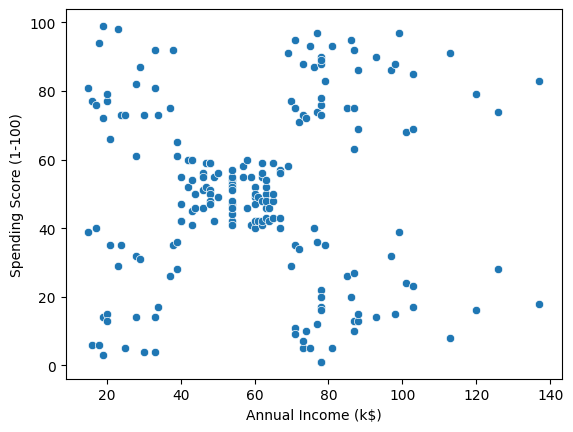

In [246]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)

In [247]:
# Determine optimal K using Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

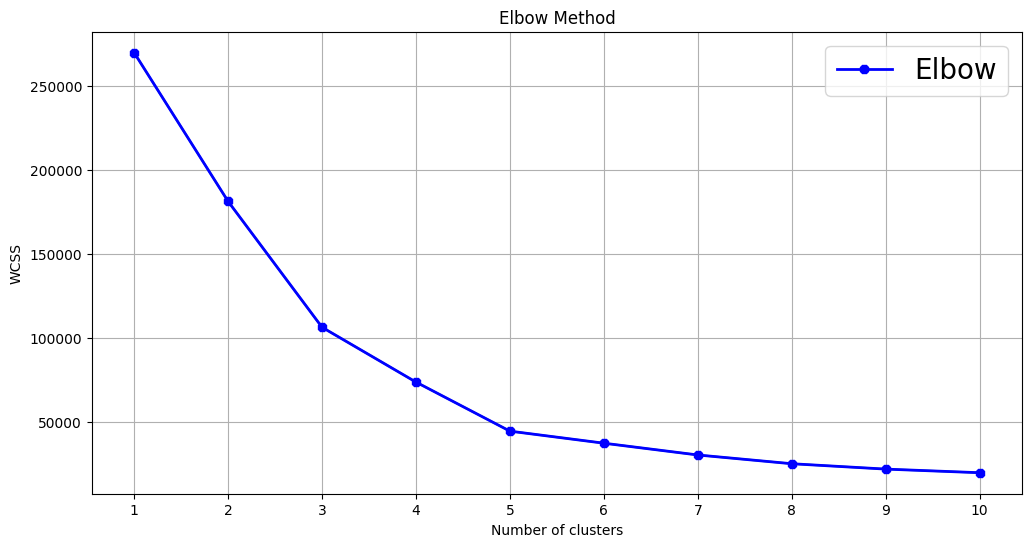

In [248]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2 ,color='blue' , marker='8', linestyle='-',label="Elbow")
plt.xticks(np.arange(1, 11, 1))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend(loc="upper right",fontsize=20)
plt.grid()
plt.show()

In [249]:
# Fit KMeans with optimal K
optimal_k = 5  # Example value
kmeans = KMeans(n_clusters=optimal_k)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [250]:
profile = data.groupby('Cluster').agg({
    'Age':'mean',
    'Annual Income (k$)':'mean',
    'Spending Score (1-100)':'mean',
    'Gender': lambda x: f"{x.mean()*100:.1f}% Male",
    'Cluster':'count'
}).rename(columns={'Cluster':'Count'})
print("\n==== Cluster Profiles ====")
print(profile.round(1))


==== Cluster Profiles ====
          Age  Annual Income (k$)  Spending Score (1-100)      Gender  Count
Cluster                                                                     
0        41.1                88.2                    17.1  54.3% Male     35
1        42.7                55.3                    49.5  40.7% Male     81
2        32.7                86.5                    82.1  46.2% Male     39
3        25.3                25.7                    79.4  40.9% Male     22
4        45.2                26.3                    20.9  39.1% Male     23


In [254]:
km1 = KMeans(n_clusters=5, random_state=42, n_init=10)
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]
km1.fit(x)
y = km1.predict(x)
data["label"] = y
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,label
0,1,19,15,39,4,4
1,1,21,15,81,3,2
2,0,20,16,6,4,4
3,0,23,16,77,3,2
4,0,31,17,40,4,4


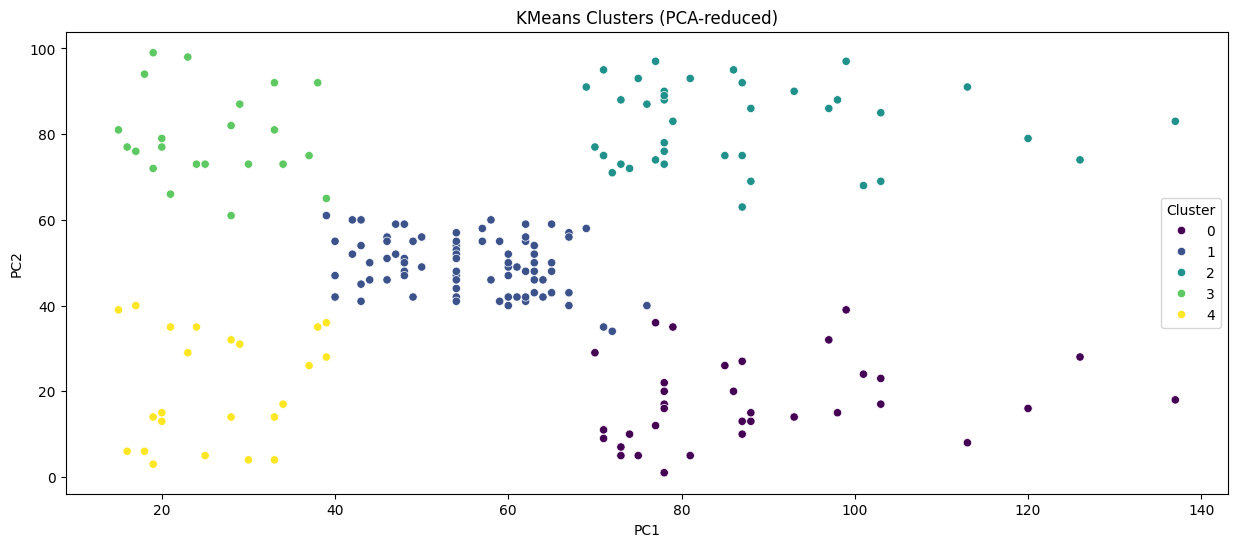

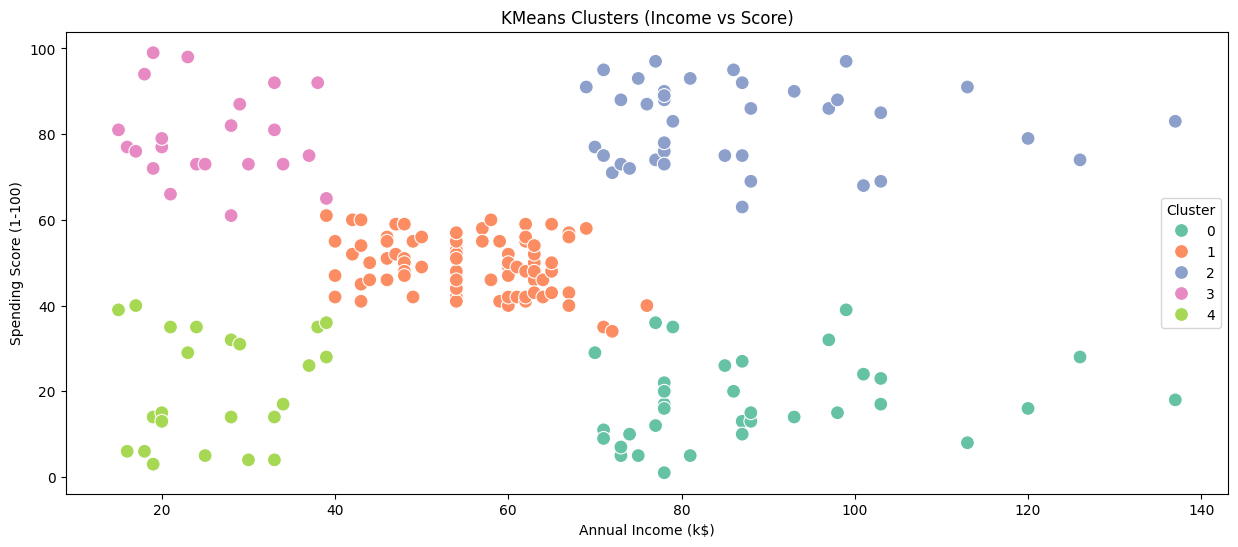

In [252]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('KMeans Clusters (PCA-reduced)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Original space
plt.figure(figsize=(15,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=data, s=100)
plt.title('KMeans Clusters (Income vs Score)')
plt.show()